Muhammad Indra Adytia Shaputra

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
abusive = pd.read_csv('/content/abusive.csv')

In [3]:
kamus_alay = pd.read_csv('/content/new_kamusalay.csv', encoding='latin1')

In [4]:
data = pd.read_csv('/content/data.csv', encoding='latin1')

In [5]:
data['total_char'] = data['Tweet'].apply(len)

In [6]:
data.shape

(13169, 14)

In [7]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89


In [8]:
kamus_alay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [9]:
abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [10]:
#memasukan kata abusive ke dalam sebuah list
abs = list(abusive['ABUSIVE'])

Mencari Total Hate Speech Pada Data

In [11]:
data.HS.value_counts()

HS
0    7608
1    5561
Name: count, dtype: int64

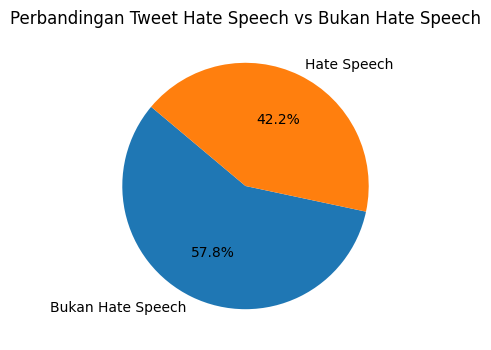

In [28]:
data['label_hs'] = data['HS'].map({1: 'Hate Speech', 0: 'Bukan Hate Speech'})

# Hitung nilai label
label_counts = data['label_hs'].value_counts()

# Buat pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Tweet Hate Speech vs Bukan Hate Speech')
plt.show()

In [13]:
data.Abusive.value_counts()

Abusive
0    8126
1    5043
Name: count, dtype: int64

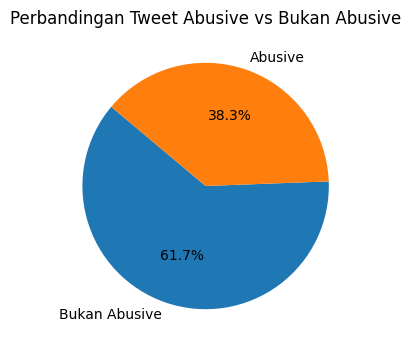

In [29]:
data['label_abs'] = data['Abusive'].map({1: 'Abusive', 0: 'Bukan Abusive'})

# Hitung nilai label
label_counts2 = data['label_abs'].value_counts()

# Buat pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts2, labels=label_counts2.index, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Tweet Abusive vs Bukan Abusive')
plt.show()

In [15]:
toxic = data[(data['HS'] == 1) | (data['Abusive'] == 1)].count().Tweet
bukan_toxic = data[(data['HS'] == 0) & (data['Abusive'] == 0)].count().Tweet

In [16]:
print(toxic)
print(bukan_toxic)

7309
5860


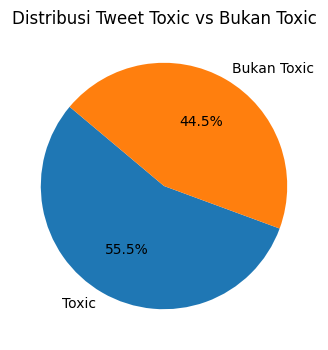

In [17]:
# Buat pie chart
labels = ['Toxic', 'Bukan Toxic']
sizes = [toxic, bukan_toxic]

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Tweet Toxic vs Bukan Toxic')
plt.show()

Mencari Rata Rata Jumlah Kata Pada label_abs

In [18]:
avg_bukan_abusive = data[data['label_abs'] == 'Bukan Abusive']['total_char'].mean()
avg_abusive = data[data['label_abs'] == 'Abusive']['total_char'].mean()

In [19]:
print(avg_bukan_abusive)
print(avg_abusive)

125.77935023381738
95.54887963513781


In [20]:
all_words = data['Tweet'].apply(lambda txt: txt.split()).sum()

In [21]:
all_words[:10]

['-',
 'disaat',
 'semua',
 'cowok',
 'berusaha',
 'melacak',
 'perhatian',
 'gue.',
 'loe',
 'lantas']

In [22]:
print(len(all_words))

227588


In [23]:
kata_abusive = []
for word in all_words:
    if word in abs:
        kata_abusive.append(word)

In [24]:
print(len(kata_abusive))

4635


In [25]:
kata_abusive[:10]

['bego',
 'sarap',
 'cebong',
 'dongok',
 'bani',
 'taplak',
 'kampret',
 'bacot',
 'jablay',
 'pecun']

In [26]:
from collections import Counter
hitung_kata_abusive = Counter(kata_abusive)

jumlah_kata_abusive = hitung_kata_abusive.most_common(10)

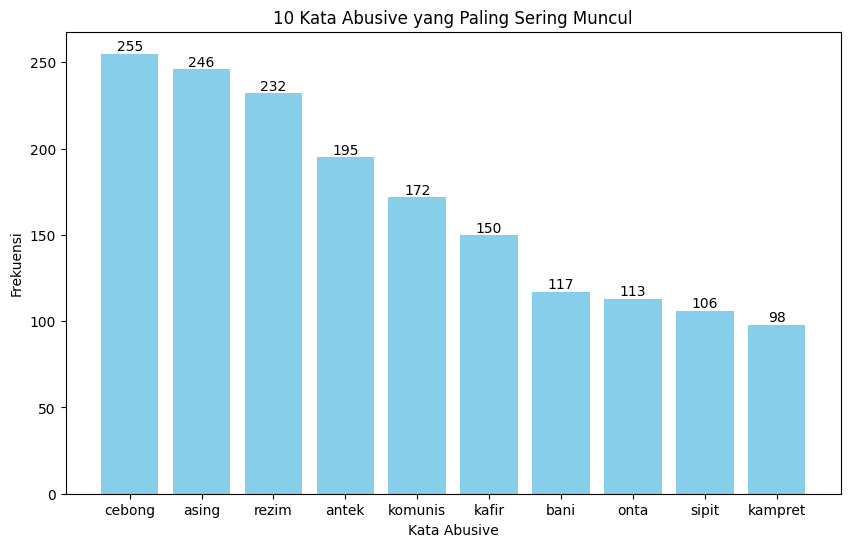

In [27]:
# Memisahkan kata dan frekuensinya untuk visualisasi
kata_abusive, jumlah = zip(*jumlah_kata_abusive)

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(kata_abusive, jumlah, color='skyblue')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Kata Abusive')
plt.ylabel('Frekuensi')
plt.title('10 Kata Abusive yang Paling Sering Muncul')
plt.show()